<a href="https://colab.research.google.com/github/4bhisheksharma/linear-regression-assignment-AI/blob/main/Week2KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Import necessary library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Description of two categories

In [ ]:

apple_features = {
    'Color Intensity': [90, 85, 95, 88, 92],
    'Surface Texture': [1, 0.8, 0.9, 0.8, 0.9]            # Smooth surface
}

orange_features = {
    'Color Intensity': [80, 85, 75, 70, 78],
    'Surface Texture': [0.5, 0.4, 0.2, 0.5, 0.4]            # Bumpy surface
}


##### Conversion to dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
apple_df = pd.DataFrame(apple_features)
orange_df = pd.DataFrame(orange_features)


In [ ]:
apple_df

,Color Intensity,Surface Texture
0,90,1.0
1,85,0.8
2,95,0.9
3,88,0.8
4,92,0.9


In [ ]:
orange_df

,Color Intensity,Surface Texture
0,80,0.5
1,85,0.4
2,75,0.2
3,70,0.5
4,78,0.4


##### Feature vector of unknown categories in numpy array

In [ ]:
apple = apple_df.to_numpy()
orange = orange_df.to_numpy()

In [ ]:
print("feature of apple")
print(apple)
print()
print("feature of orange")

print(orange)

feature of apple
[[90.   1. ]
 [85.   0.8]
 [95.   0.9]
 [88.   0.8]
 [92.   0.9]]

feature of orange
[[80.   0.5]
 [85.   0.4]
 [75.   0.2]
 [70.   0.5]
 [78.   0.4]]


In [ ]:
apple[:,0]

array([90., 85., 95., 88., 92.])

In [ ]:
apple[:,1]

array([1. , 0.8, 0.9, 0.8, 0.9])

##### Feature vector of unknown categories

In [ ]:
new_category_features = {
    'Color Intensity': [85],
    'Surface Texture': [0.5]
}

In [ ]:
new_category_features = pd.DataFrame(new_category_features)

In [ ]:
new_category_features

,Color Intensity,Surface Texture
0,85,0.5


In [ ]:
new_featurevector = new_category_features.to_numpy()

In [ ]:
new_featurevector

array([[85. ,  0.5]])

In [ ]:
new_featurevector[:,0]

array([85.])

##### visualization

In [ ]:
import pandas as pd
df = pd.read_csv('AI_workshop/disease.csv')
df

,Unnamed: 0,a,b,Category
0,0,37.454012,9.256646,dis_a
1,1,95.071431,27.095047,dis_a
2,2,73.199394,43.647292,dis_a
3,3,59.865848,36.611244,dis_a
4,4,15.601864,40.328057,dis_a
...,...,...,...,...
1995,1995,86.529576,22.105352,dis_b
1996,1996,15.727321,16.720059,dis_b
1997,1997,30.978786,19.728616,dis_b
1998,1998,29.004553,26.497029,dis_b


(-0.5, 1.5)

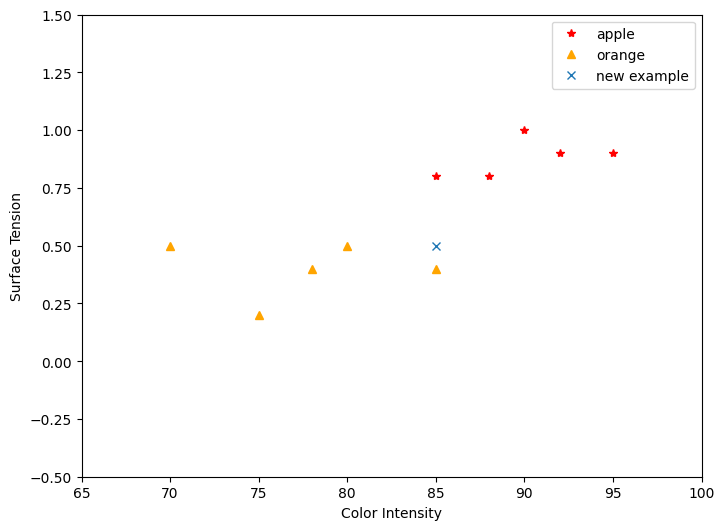

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(apple[:,0],apple[:,1],"*",label="apple", c = 'red')
plt.plot(orange[:,0],orange[:,1],"^",label="orange", c = 'orange')
plt.plot(new_featurevector[:,0],new_featurevector[:,1],"x",label="new example")
plt.legend(loc='upper right')
plt.xlabel("Color Intensity")
plt.ylabel("Surface Tension")

plt.xlim(65, 100)  # Adjust based on your data
plt.ylim(-0.5, 1.5)  # Adjust based on your data

##### Euclidean distance

![image-2.png](attachment:image-2.png)

In [ ]:
new_featurevector[0,1]

np.float64(0.5)

In [ ]:
for a in apple:
    print(a[1])

1.0
0.8
0.9
0.8
0.9


In [ ]:
def euclidean_dist(x1,x2,y1,y2):
    return ((x2-x1)**2+(y2-y1)**2)**0.5
print("new cateogy distance in space from apple")

for a in apple:
    print(euclidean_dist(new_featurevector[0,0],a[0],new_featurevector[0,1],a[1]))
print()
print("new cateogy distance in space from orange")

for o in orange:
    print(euclidean_dist(new_featurevector[0,0],o[0],new_featurevector[0,1],o[1]))

new cateogy distance in space from apple
5.024937810560445
0.30000000000000004
10.007996802557443
3.014962686336267
7.011419257183241

new cateogy distance in space from orange
5.0
0.09999999999999998
10.004498987955369
15.0
7.000714249274855


In [ ]:
# DIY:
#     Do the task using Manhattan

In [ ]:
def manhattan_dist(x1,x2,y1,y2):
    return (abs(x2-x1)+abs(y2-y1))
print("new cateogy distance in space from apple")

for a in apple:
    print(manhattan_dist(new_featurevector[0,0],a[0],new_featurevector[0,1],a[1]))
print()
print("new cateogy distance in space from orange")

for o in orange:
    print(manhattan_dist(new_featurevector[0,0],o[0],new_featurevector[0,1],o[1]))

new cateogy distance in space from apple
5.5
0.30000000000000004
10.4
3.3
7.4

new cateogy distance in space from orange
5.0
0.09999999999999998
10.3
15.0
7.1


#### Do it yourself (workshop 1)
- Convert each varible to dataframe
- Convert datafrafe to numpy array
- demonstrate datapoint in 3d view using mpl_toolkits.mplot3d

In [ ]:
a_grade_grapes = {
    'Color Intensity': [85, 88, 90, 87, 89],     # High color intensity
    'Surface Texture': [0.2, 0.25, 0.22, 0.24, 0.21],  # Very smooth surface
    'Sugar Content': [18.5, 19.0, 19.2, 18.8, 19.1]  # High sugar content
}

b_grade_grapes = {
    'Color Intensity': [75, 78, 80, 77, 79],     # Moderate color intensity
    'Surface Texture': [0.3, 0.35, 0.33, 0.34, 0.31],  # Smooth surface
    'Sugar Content': [15.0, 15.5, 15.2, 15.1, 15.4]  # Moderate sugar content
}

c_grade_grapes = {
    'Color Intensity': [60, 65, 63, 62, 64],     # Lower color intensity
    'Surface Texture': [0.4, 0.42, 0.41, 0.39, 0.43],  # Rougher surface
    'Sugar Content': [12.0, 12.5, 12.2, 12.1, 12.3]  # Lower sugar content
}




In [ ]:
# Converting to DataFrames
df_a = pd.DataFrame(a_grade_grapes)
df_b = pd.DataFrame(b_grade_grapes)
df_c = pd.DataFrame(c_grade_grapes)

print(df_a)

print(df_b)

print(df_c)

   Color Intensity  Surface Texture  Sugar Content
0               85             0.20           18.5
1               88             0.25           19.0
2               90             0.22           19.2
3               87             0.24           18.8
4               89             0.21           19.1
   Color Intensity  Surface Texture  Sugar Content
0               75             0.30           15.0
1               78             0.35           15.5
2               80             0.33           15.2
3               77             0.34           15.1
4               79             0.31           15.4
   Color Intensity  Surface Texture  Sugar Content
0               60             0.40           12.0
1               65             0.42           12.5
2               63             0.41           12.2
3               62             0.39           12.1
4               64             0.43           12.3


In [ ]:
# Converting DataFrames to numpy arrays
np_a = df_a.to_numpy()
np_b = df_b.to_numpy()
np_c = df_c.to_numpy()


print(np_a)
print("============================")
print(np_b)
print(np_c)

[[85.    0.2  18.5 ]
 [88.    0.25 19.  ]
 [90.    0.22 19.2 ]
 [87.    0.24 18.8 ]
 [89.    0.21 19.1 ]]
[[75.    0.3  15.  ]
 [78.    0.35 15.5 ]
 [80.    0.33 15.2 ]
 [77.    0.34 15.1 ]
 [79.    0.31 15.4 ]]
[[60.    0.4  12.  ]
 [65.    0.42 12.5 ]
 [63.    0.41 12.2 ]
 [62.    0.39 12.1 ]
 [64.    0.43 12.3 ]]


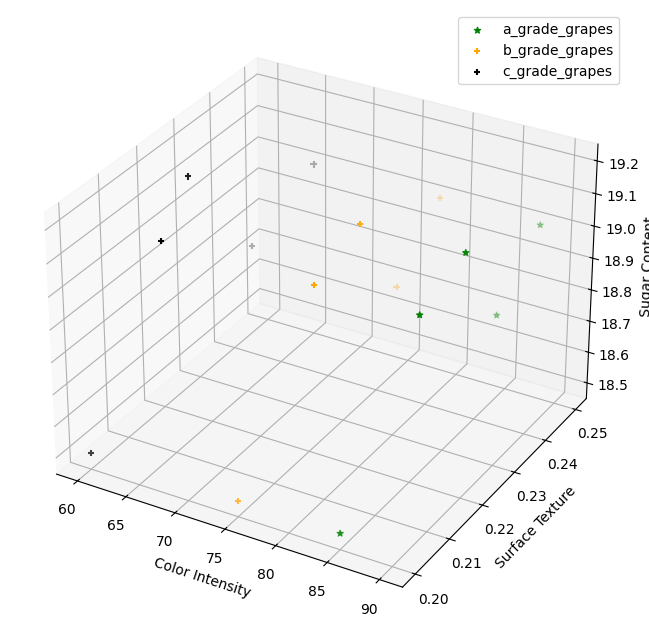

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np_a[:, 0], np_a[:, 1], np_a[:, 2], marker='*', label='a_grade_grapes', color='green')
ax.scatter(np_b[:, 0], np_a[:, 1], np_a[:, 2], marker='+', label='b_grade_grapes', color='orange')
ax.scatter(np_c[:, 0], np_a[:, 1], np_a[:, 2], marker='+', label='c_grade_grapes', color='black')

ax.set_xlabel('Color Intensity')
ax.set_ylabel('Surface Texture')
ax.set_zlabel('Sugar Content')


ax.legend(loc='upper right')

plt.show()

In [ ]:
new = {
    'Color Intensity': [62],     # Lower color intensity
    'Surface Texture': [0.9],  # Rougher surface
    'Sugar Content': [12.1]  # Lower sugar content
}

In [ ]:
new_df = pd.DataFrame(new)

print(new)

{'Color Intensity': [62], 'Surface Texture': [0.9], 'Sugar Content': [12.1]}


In [ ]:
new_np = new_df.to_numpy()
print(new_np)

[[62.   0.9 12.1]]


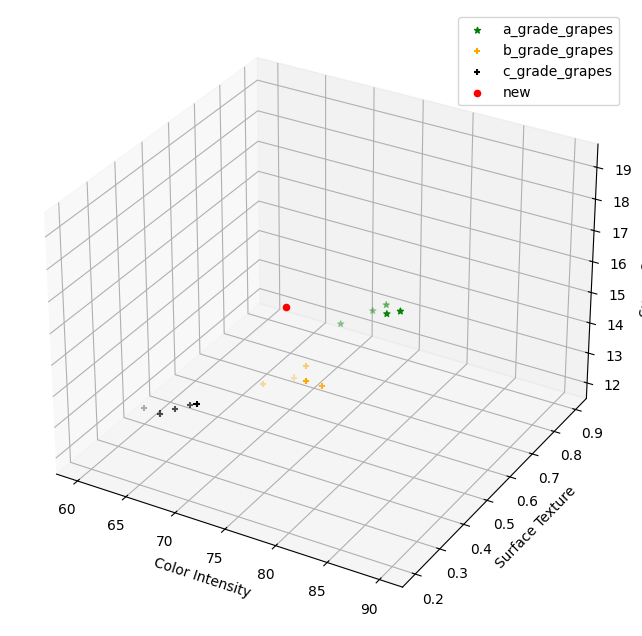

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np_a[:, 0], np_a[:, 1], np_a[:, 2], marker='*', label='a_grade_grapes', color='green')
ax.scatter(np_b[:, 0], np_b[:, 1], np_b[:, 2], marker='+', label='b_grade_grapes', color='orange')
ax.scatter(np_c[:, 0], np_c[:, 1], np_c[:, 2], marker='+', label='c_grade_grapes', color='black')
ax.scatter(new_np[:, 0], new_np[:, 1], new_np[:, 2], marker='o', label='new', color='red')

ax.set_xlabel('Color Intensity')
ax.set_ylabel('Surface Texture')
ax.set_zlabel('Sugar Content')


ax.legend(loc='upper right')

plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(np_a[:, 0], a[:, 1], a[:, 2], marker='*', label='a_grade_grapes', color='red')

# ax.set_xlabel('Length')
# ax.set_ylabel('Width')
# ax.set_zlabel('Third Feature')
# ax.legend(loc='upper right')



# # Show the plot
# plt.show()

##### hint for 3d plot

In [ ]:
df=pd.read_csv("AI_workshop/disease.csv")

In [ ]:
df

,Unnamed: 0,a,b,Category
0,0,37.454012,9.256646,dis_a
1,1,95.071431,27.095047,dis_a
2,2,73.199394,43.647292,dis_a
3,3,59.865848,36.611244,dis_a
4,4,15.601864,40.328057,dis_a
...,...,...,...,...
1995,1995,86.529576,22.105352,dis_b
1996,1996,15.727321,16.720059,dis_b
1997,1997,30.978786,19.728616,dis_b
1998,1998,29.004553,26.497029,dis_b


##### Scikit-learn is a powerful open-source machine learning library
##### It offers a wide range of algorithms and functionalities tools for various machine learning tasks.
##### It is utilized by both beginners and experienced practitioners.



# installation



```
# This is formatted as code
```

pip install scikit-learn

##### Train_test_split

##### Purpose:To divide your dataset into two parts: one for training the model and one for testing its performance.

In [ ]:

X = df[['a', 'b']].to_numpy()  # Features
y = df['Category'].to_numpy()   # Labels

In [ ]:
X

array([[37.45401188,  9.25664644],
       [95.07143064, 27.09504737],
       [73.19939418, 43.64729179],
       ...,
       [30.97878592, 19.72861577],
       [29.0045532 , 26.49702935],
       [87.14140342,  8.06836792]])

In [ ]:
y

array(['dis_a', 'dis_a', 'dis_a', ..., 'dis_b', 'dis_b', 'dis_b'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# test_size=0.2
# random_state=42

In [ ]:
X_train,y_train

(array([[56.64046403, 16.72556444],
        [94.04585844, 43.4311584 ],
        [33.51972416, 19.09698198],
        ...,
        [77.55276167, 38.82237232],
        [40.17788007, 32.43194784],
        [63.46712733, 33.64358343]]),
 array(['dis_a', 'dis_a', 'dis_a', ..., 'dis_a', 'dis_b', 'dis_b'],
       dtype=object))

In [ ]:
X_train.shape,y_train.shape

((1600, 2), (1600,))

In [ ]:
X_test.shape,y_test.shape

((400, 2), (400,))

#### KNeighborsClassifier

##### Supervised k-NN:
##### This uses the k-NN algorithm for classification tasks.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicted_class = knn.predict(X_test[0].reshape(1, -1))

In [ ]:
predicted_probabilities = knn.predict_proba(X_test[0].reshape(1, -1))

In [ ]:
print("Predicted class:", predicted_class)
print("Predicted class probabilities:", predicted_probabilities)

Predicted class: ['dis_b']
Predicted class probabilities: [[0.33333333 0.66666667]]


In [ ]:
predicted_class = knn.predict(X_test[350].reshape(1, -1))
predicted_probabilities = knn.predict_proba(X_test[350].reshape(1, -1))
print("Predicted class:", predicted_class)
print("Predicted class probabilities:", predicted_probabilities)

Predicted class: ['dis_b']
Predicted class probabilities: [[0. 1.]]


In [ ]:
predicted_class = knn.predict(X_test[200].reshape(1, -1))
predicted_probabilities = knn.predict_proba(X_test[200].reshape(1, -1))
print("Predicted class:", predicted_class)
print("Predicted class probabilities:", predicted_probabilities)

Predicted class: ['dis_a']
Predicted class probabilities: [[0.66666667 0.33333333]]


In [ ]:
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.75%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[110  89]
 [ 96 105]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       dis_a       0.53      0.55      0.54       199
       dis_b       0.54      0.52      0.53       201

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400



##### Loading default dataset from scikit learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris_data = load_iris() #load the iris dataset
X = iris_data.data
y = iris_data.target
print(len(X)) #print number of examples

150


In [ ]:
type(iris_data)

sklearn.utils._bunch.Bunch

In [ ]:
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['species'] = iris_data.target


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### do it youself
- Solve using KNeighborsClassifier

In [ ]:
df=pd.read_csv("loan_defaulter_data.csv")

In [ ]:
df

,Age,Income,Loan_Amount,Credit_Score,Employment_Status,Defaulter
0,56,69376,331033,679,1,1
1,46,65587,155893,520,0,0
2,32,56976,431783,719,1,0
3,60,124587,116374,423,1,0
4,25,147534,25860,721,0,0
...,...,...,...,...,...,...
995,23,142901,494158,764,0,0
996,43,40953,55823,403,0,1
997,21,96919,24312,801,1,0
998,36,134682,437324,474,0,0
